## Geometric Brownian Motion:

$$
\frac{S_{t+dt}-S_t}{S_t} = \mu dt + \sigma\sqrt{dt}\xi_t
$$

Generating a value for the percent return of our portfolio between times steps $t+dt$ and $t$.

$\mu$ represents the general trend of our portfolio (gaining or decreasing in value with every time step on average)

$\sigma\sqrt{dt}\xi_t$ is the random movement in a given time step (random walk is here, equal probability of going up or down)

In [32]:
!pip install pandas_datareader

This returns as numpy array

In [33]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

#default values are set

#you can change the # of years of simulation, # of scenarios, mu, sigma (volatility), steps_per_year, and initial stock price
def gbm(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    # Derive per-step Model Parameters from User Specifications
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    # start with just the returns, biased by mu_dt plus 1 since we'll need that later
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    prices = s_0*(1+rets).cumprod()
    return prices

this function returns pandas dataframe

In [34]:
%matplotlib inline

def gbm0(n_years = 10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    # Derive per-step Model Parameters from User Specifications
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    # converts returns to a DataFrame
    rets = pd.DataFrame(rets)
    # convert to prices
    prices = s_0*(rets+1).cumprod()
    return prices

In [35]:
type(gbm0())

pandas.core.frame.DataFrame

In [36]:
type(gbm())

numpy.ndarray

In [37]:
p = gbm0(n_years=10, n_scenarios=10000, mu=0.07)

In [38]:
p.shape

(120, 10000)

Plotting our GBM function

<Axes: >

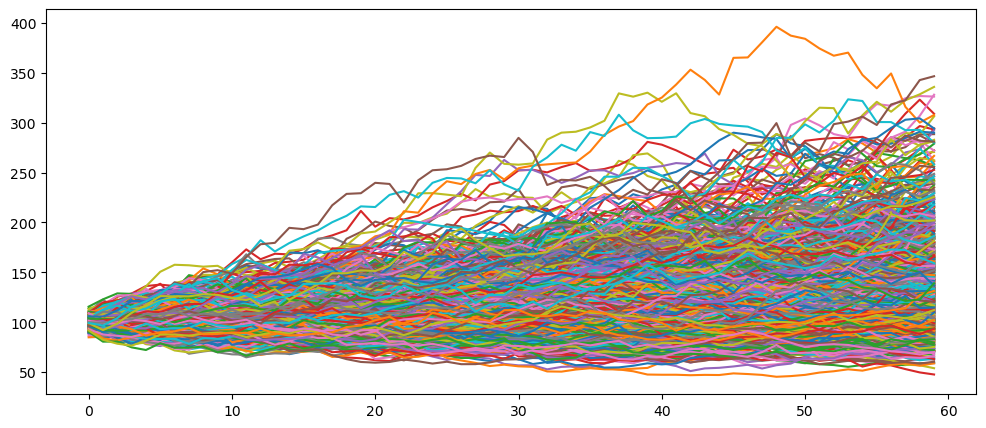

In [39]:
gbm0(n_years=5, n_scenarios=1000, mu=0.07).plot(figsize=(12,5), legend=False)

In [40]:
%timeit gbm0(n_years=5, n_scenarios=1000, mu=0.07)

9.36 ms ± 1.79 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## CPPI (Constant Proportio Portfolio Insurance) strategy

Dynamic portfolio insurance strategy. Investor's downside risk is limited while retaining some upside potential if market performs well. 

In [41]:
prices =  gbm0(n_scenarios=10, mu=2, sigma=3, s_0=2)
prices

,0,1,2,3,4,5,6,7,8,9
0,4.914811e+00,1.359516e+00,1.935074,2.601674e+00,2.700935e+00,3.907801e+00,2.371869e+00,2.390637,-0.809724,2.273565
1,-4.062358e-01,2.435738e+00,2.105455,-1.727355e-01,4.648572e-01,4.929761e+00,4.696471e+00,-2.927189,-0.906476,0.822050
2,-3.151872e-01,1.232036e+00,3.898210,-4.521868e-01,6.748561e-01,5.435029e+00,6.275685e+00,-8.848786,-0.162297,1.547506
3,-6.024386e-01,2.014562e-01,-1.101771,-4.604151e-01,1.055999e+00,5.001074e+00,1.424033e+00,-18.661758,-0.126168,1.724712
4,-7.050748e-01,4.574772e-01,-2.279773,4.697942e-01,-2.575845e-01,4.385519e+00,1.697118e+00,3.630077,-0.050177,6.970788
...,...,...,...,...,...,...,...,...,...,...
115,-1.361088e-10,8.822593e-08,49.295863,-5.858565e-07,-3.288797e-07,5.067508e-08,1.060741e-06,0.000715,-0.000032,-177.840834
116,-2.578676e-10,6.057090e-08,0.067308,3.518587e-08,-5.549089e-08,3.839806e-08,2.770655e-06,0.000772,-0.000061,-251.110227
117,-4.671471e-10,3.677424e-08,0.045557,6.239205e-08,-6.787670e-09,-1.792727e-09,6.681952e-06,0.000521,-0.000064,82.066774
118,-5.416746e-10,1.278864e-07,0.053417,7.075553e-08,-1.247352e-08,-4.425468e-09,1.660605e-06,0.000708,-0.000154,168.425938


In [42]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of a stock price evolution under a Geometric Brownian Motion model
    """
    s_0=100
    prices =  gbm0(n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color="indianred", alpha = 0.5, linewidth=2, figsize=(12,5))
    ax.axhline(y=100, ls=":", color="black")
    # draw a dot at the origin
    ax.plot(0,s_0, marker='o',color='darkred', alpha=0.2)
    ax.set_title(f"Geometric Brownian Motion with mu={mu}, sigma={sigma}")
    ax.set_xlabel("Time (in years)")
    ax.set_ylabel("Stock Price")

In [43]:
!pip install ipywidgets

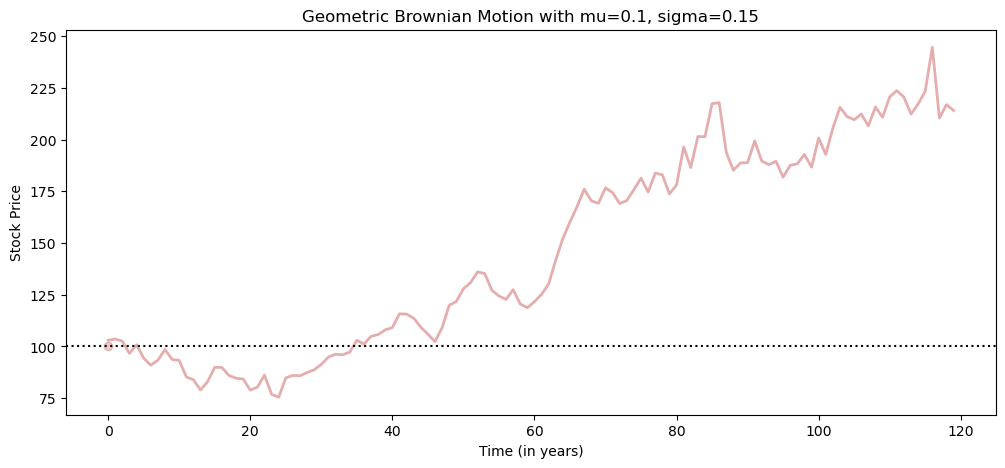

In [44]:
import ipywidgets as widgets
from IPython.display import display
gbm_controls = widgets.interactive(show_gbm,
                                   n_scenarios=widgets.IntSlider(min=1, max=20, step=1, value=1),
                                   mu=(0., +.2,.01),
                                   sigma=(0, .3, .01)
)

## Monte Carlo Simulations for multiple stocks

C:\Users\kevin\AppData\Local\Temp\ipykernel_15016\3398122001.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers_list, start='2014-01-01', end='2022-01-01', interval = '1d')['Close']
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

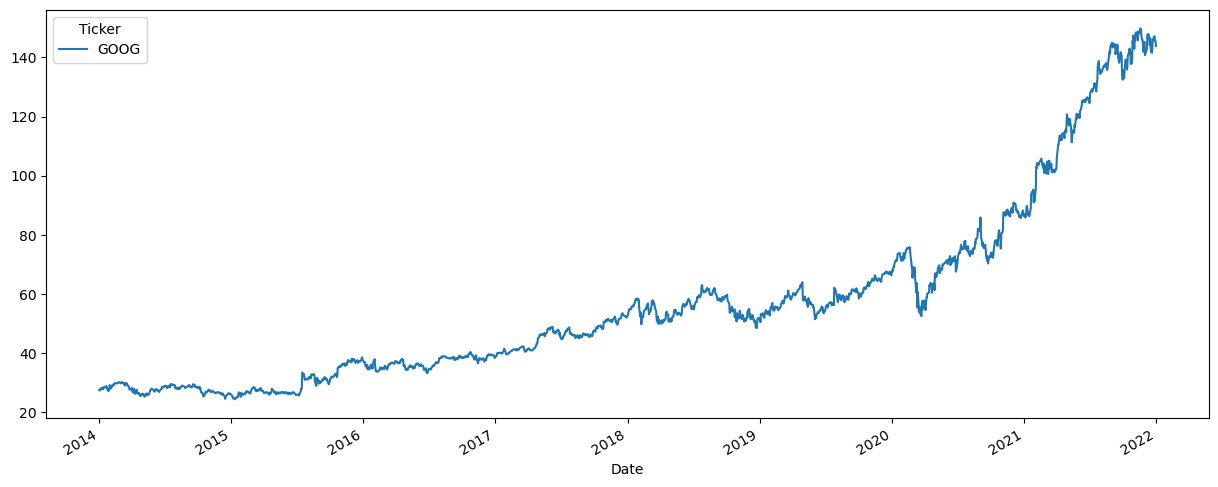

In [45]:
import yfinance as yf
tickers_list = ['GOOG']
data = yf.download(tickers_list, start='2014-01-01', end='2022-01-01', interval = '1d')['Close']

data.plot(figsize=(15,6))

Import stock data with pandas_datareader

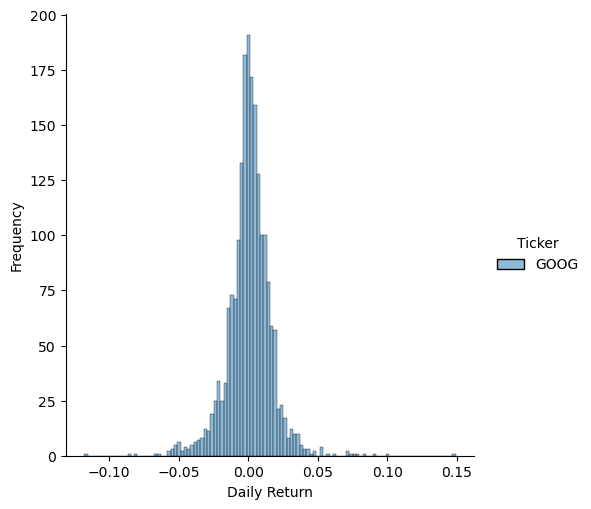

In [46]:
log_returns = np.log(1 + data.pct_change())
#Plot
sns.displot(log_returns.iloc[1:])
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

The reason why it's centered around zero is because we are taking the log of the percent change + 1. Since percent change is very close to 0, we are essentially taking the log(1), which is 0.

Computing drift for our returns & variance & mean of daily returns

In [47]:
#find the mean of the returns
u = log_returns.mean().iloc[0]
#find variance of the returns
var = log_returns.var().iloc[0]

#finding the drift
drift = u - (0.5*var)

#finding the standard deviation
stdev = log_returns.std().iloc[0]


days = 50
trials = 100
# Generate random numbers from a standard normal distribution (mean 0, std 1)
Z = norm.ppf(np.random.rand(days, trials)) #generates a days x trials matrix of standard normal variables, simulating random stocks

#we are using the standard normal distribution and then scaling/shifting to apply to more complex distributions

# Generate daily returns using the GBM formula: the drift + standard deviation * Z, which Z are the random shocks/simulations
#essentially, the drift is the shift.

#.exp is to get the daily returns back to the original scale (thanks to vector operations)
daily_returns = np.exp(drift + stdev * Z)

In [48]:
daily_returns

array([[1.00945977, 0.99490923, 1.01168161, ..., 0.99665676, 1.01599021,
        1.01010284],
       [0.98831932, 1.03456402, 0.98900948, ..., 0.99951158, 1.01728409,
        1.01460211],
       [0.97602585, 0.99361384, 0.97639493, ..., 0.99864243, 1.01654421,
        1.00102077],
       ...,
       [1.00036154, 0.99634614, 0.99572931, ..., 1.03230058, 0.99144133,
        0.98975268],
       [1.00358914, 1.00164518, 0.98952453, ..., 1.00376983, 0.98791325,
        0.98528974],
       [1.00440611, 1.01081511, 1.00498077, ..., 0.98867296, 1.03104526,
        1.01825936]], shape=(50, 100))

Explanation: Look back on recording for Desmos/Geometric explanation

In [49]:
price_paths = np.zeros_like(daily_returns)

#simulation starts with last price in the data
price_paths[0] = data.iloc[-1]
for t in range(1, days):
    price_paths[t] = price_paths[t-1]*daily_returns[t]

Column = Trial <br>
Row = Day

In [50]:
price_paths.shape

(50, 100)

<Axes: >

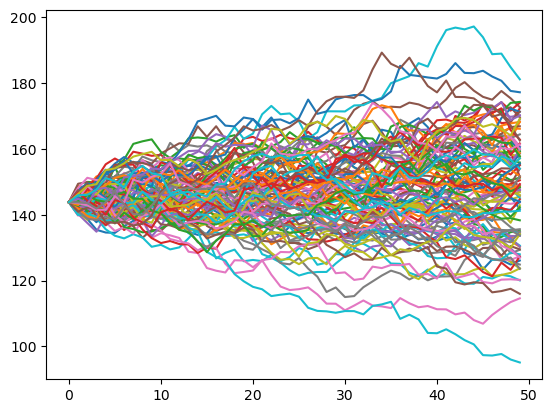

In [51]:
pd.DataFrame(price_paths).plot(legend=None)

# EXERCISES

In [52]:
import yfinance as yf
tickers_list = ['TSLA']
data = yf.download(tickers_list, start='2015-01-01', end='2022-01-01', interval = '1d')

data['Log Return'] = np.log(data['Close'] / data['Close'].shift(1))

data = data[["Log Return", "Close"]]

C:\Users\kevin\AppData\Local\Temp\ipykernel_15016\769943168.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers_list, start='2015-01-01', end='2022-01-01', interval = '1d')
[*********************100%***********************]  1 of 1 completed


In [53]:
data

Price,Log Return,Close
Ticker,,TSLA
Date,,
2015-01-02,NaN,14.620667
2015-01-05,-0.042950,14.006000
2015-01-06,0.005648,14.085333
2015-01-07,-0.001563,14.063333
2015-01-08,-0.001566,14.041333
...,...,...
2021-12-27,0.024935,364.646667
2021-12-28,-0.005013,362.823334


histogram of TSLA Log Returns

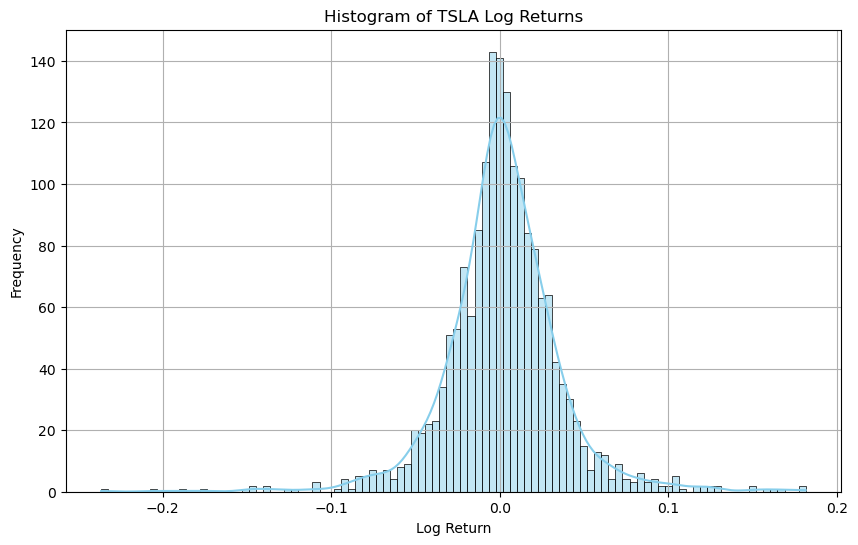

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Log Return'], bins = 100, kde = True, color = 'skyblue')
plt.title('Histogram of TSLA Log Returns')

plt.xlabel('Log Return')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()